<a href="https://colab.research.google.com/github/RaedHadad/Elephant/blob/main/Tut_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Index stored in Firebase successfully.


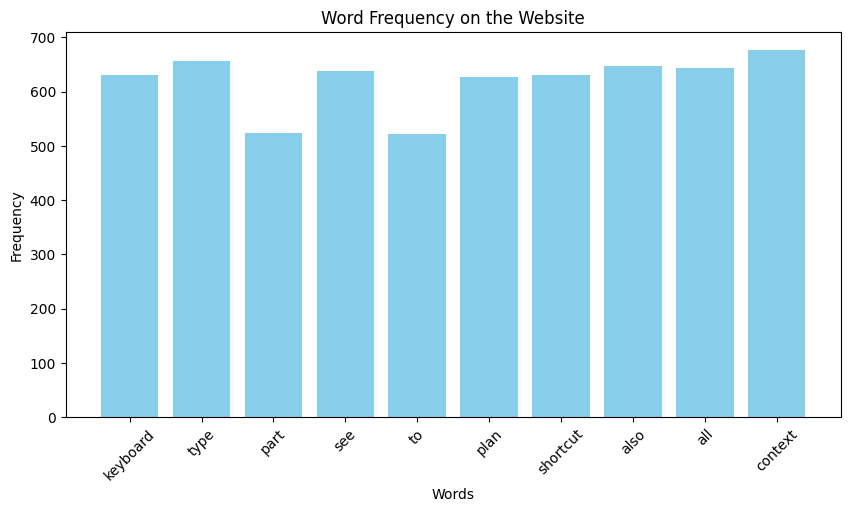

In [ ]:
import firebase_admin
from firebase_admin import credentials, firestore
import matplotlib.pyplot as plt

# Initialize Firebase using the uploaded JSON file
cred = credentials.Certificate('tirgul-5-a91f5-firebase-adminsdk-4p0lf-493227c492.json')
firebase_admin.initialize_app(cred, name='6.3')

db = firestore.client()

def store_index_in_firebase(index):
    doc_ref = db.collection('glossary_index').document('index')
    doc_ref.set(index)

def fetch_index_from_firebase():
    doc_ref = db.collection('glossary_index').document('index')
    doc = doc_ref.get()
    if doc.exists:
        return doc.to_dict()
    else:
        print("No such document!")
        return None

# Function to visualize the frequency of words
def visualize_word_frequencies(word_frequencies):
    words = list(word_frequencies.keys())
    frequencies = list(word_frequencies.values())

    plt.figure(figsize=(10, 5))
    plt.bar(words, frequencies, color='skyblue')
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.title('Word Frequency on the Website')
    plt.xticks(rotation=45)
    plt.show()

# Fetch data from the website and store it in Firebase
url = 'https://cad.onshape.com/help/Content/Glossary/glossary.htm?tocpath=_____19'
soup = fetch_page(url)

if soup:
    index = index_words(soup)
    index = remove_stop_words(index)
    index = apply_stemming(index)

    top_10_words = dict(sorted(index.items(), key=lambda item: item[1], reverse=True)[:10])

    # Store the index in Firebase
    store_index_in_firebase(top_10_words)
    print("Index stored in Firebase successfully.")
else:
    print("Failed to fetch the webpage.")

# Fetch the index from Firebase and visualize it
word_frequencies = fetch_index_from_firebase()
if word_frequencies:
    visualize_word_frequencies(word_frequencies)
